# Arima and Seasonal Arima

##### Autoregressive Intergrated Moving Averages
###### The general process for Arima models is the following:
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [5]:
#chnage column name
df.columns=["Month","Sales"]


In [6]:
#check null values
pd.isnull(df).sum()

Month    1
Sales    2
dtype: int64

In [7]:
#removing null values
df.dropna(inplace=True)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
#convert the month to datetime format
df["Month"] = pd.to_datetime(df["Month"])

In [11]:
#set date as index
df.set_index("Month",inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualization

<Axes: xlabel='Month'>

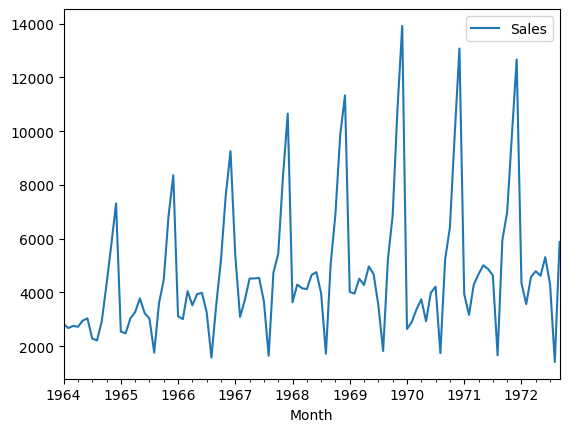

In [13]:
#time series plot
df.plot()

In [14]:
### Stationarity Test
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result = adfuller(df["Sales"])

In [16]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistics","p-value","#Lags used","Number of observations used"]
    for value, label in zip(result,labels):
        print(label+ ":" +str(value))
    if result[1]<=0.05:
        print("data is staionary")
    else:
        print("data is not staionary")

In [17]:
adfuller_test(df["Sales"])

ADF Test Statistics:-1.8335930563276195
p-value:0.3639157716602467
#Lags used:11
Number of observations used:93
data is not staionary


# Differncing


In [19]:
df["seasonal first diff"] = df["Sales"] - df["Sales"].shift(1)

In [20]:
df["seasonal first diff"] = df["Sales"]-df["Sales"].shift(12)

In [24]:
df.head(14)

,Sales,seasonal first diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [22]:
adfuller_test(df["seasonal first diff"].dropna())

ADF Test Statistics:-7.626619157213166
p-value:2.0605796968136632e-11
#Lags used:0
Number of observations used:92
data is staionary


<Axes: xlabel='Month'>

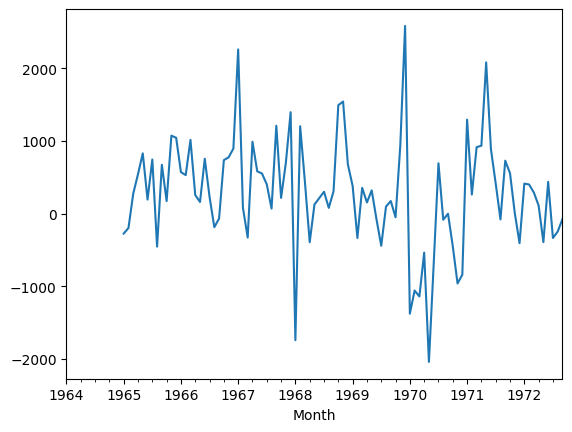

In [25]:
df["seasonal first diff"].plot()

# Auto Regressive Model

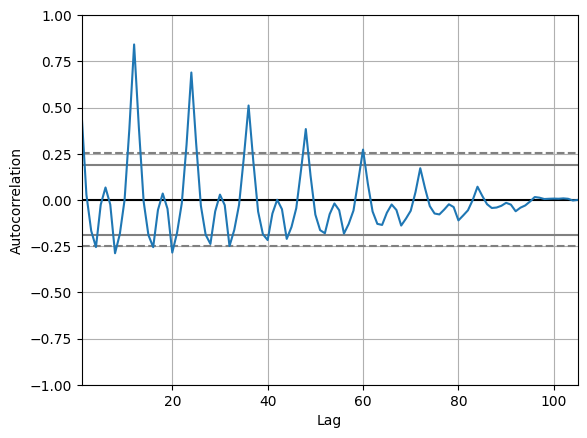

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["Sales"])
plt.show()

#### Final Thoughts on Autocorrelation and Partial Autocorrelation
- Identification of an AR model is often best done with the PACF.

- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
- Identification of an MA model is often best done with the ACF rather than the PACF. p,d,q

- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p AR model lags d differencing q MA lags

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import statsmodels.api as sm


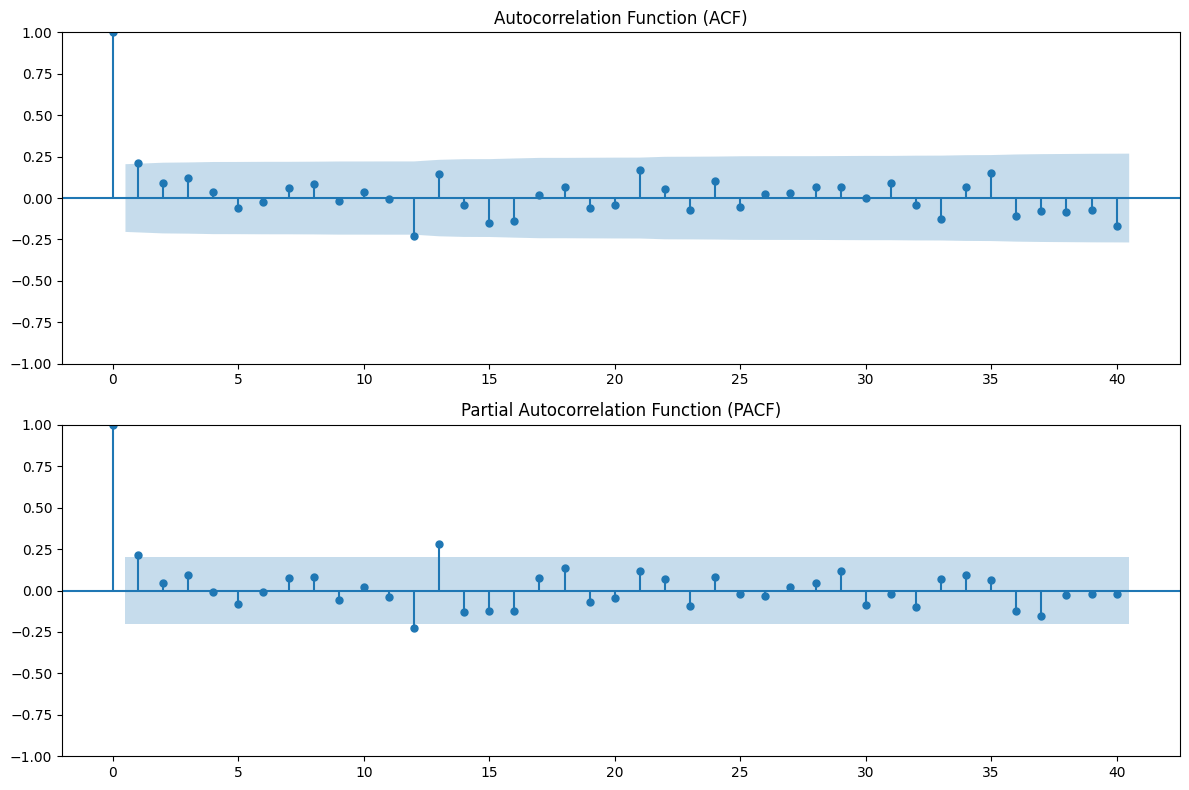

In [31]:

fig = plt.figure(figsize=(12, 8))

# ACF plot
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df["seasonal first diff"].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df["seasonal first diff"].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [34]:
# for non_seasonal data (only used for seasonal)
#p =1 ,d=1, q = 0 or 1

from statsmodels.tsa.arima.model import ARIMA

In [35]:
model = ARIMA(df["Sales"],order=(1,1,1))
model_fit = model.fit()

c:\Users\GGN06-Ansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 28 Jul 2024   AIC                           1911.627
Time:                        20:34:17   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
model = sm.tsa.statespace.SARIMAX(df["Sales"],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit() 

c:\Users\GGN06-Ansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

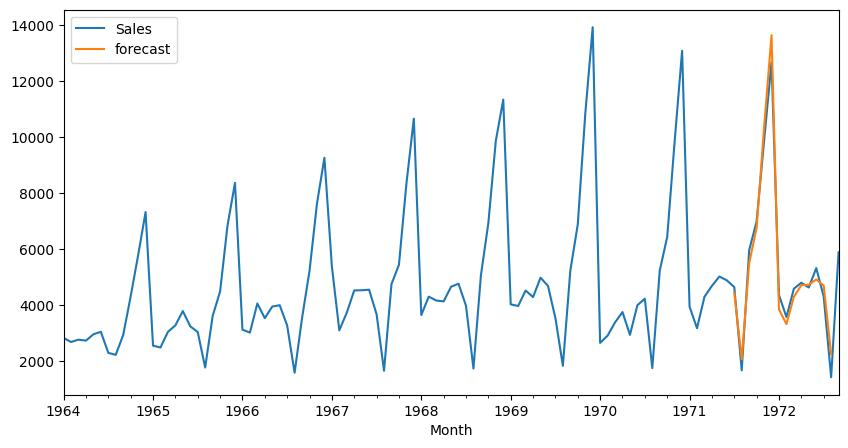

In [40]:
df["forecast"] = results.predict(start = 90,end=103,dynamic=True)
df[["Sales","forecast"]].plot(figsize = (10,5))

In [41]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [42]:
future_dataset_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [43]:
future_dataset_df.head()

,Sales,seasonal first diff,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN


In [44]:
future_dataset_df.tail()

,Sales,seasonal first diff,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [45]:
future_df = pd.concat([df,future_dataset_df])

C:\Users\GGN06-Ansh\AppData\Local\Temp\ipykernel_2200\127507088.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df,future_dataset_df])


<Axes: >

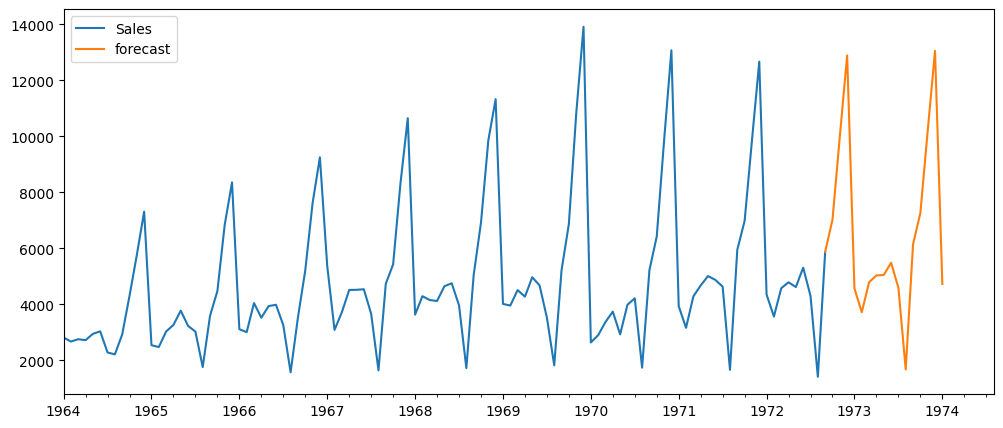

In [48]:
future_df["forecast"] = results.predict(start= 104, end = 120,dynamic=True)
future_df[["Sales","forecast"]].plot(figsize=(12,5))